# Analisis de ventas
El siguiente notebook presenta algunas estadisticas calculadas a partir de una base de datos de ventas de una empresa

## Leer y preprocesar los datos

In [28]:
import openpyxl
import pandas as pd
import numpy as np

In [29]:
## Read xlsx sheets
dfs = {} 

for mes in ['noviembre', 'diciembre', 'enero', 'febrero']:
    dfs[mes] = pd.read_excel('Test Cohorts.xlsx', sheet_name=mes)

In [30]:
def preprocess_data(df):

    #Extract the type of plan from Invoice column and save it into a new column
    df["Plan"] = df["Invoice"].str.extract(r'([P]\d)')

    #Extract the duration of plan from Invoice column and save it into a new column
    df["Duration"] = df["Invoice"].fillna("").str.split("-").str[2]
    df["Duration"] = pd.to_numeric(df["Duration"], errors='coerce')
    df["Duration"].fillna(0, inplace=True)
    df["Duration"] = df["Duration"].astype(int)
    
    ##Convert the column Validated Date to the format "mm-aaaa"
    df.rename(columns={"Validated Date": "Date"}, inplace=True)
    df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%m-%Y')
    
    

    #Remove columns with nulls
    df.drop(['Local VAT','Create Date', 'Local Original Amount','EXTRAE', 'extrae'], axis=1, inplace=True, errors='ignore')
    
    #Keep only transactions with status paid
    df = df.loc[df['Status'] == 'PAID']
    
    return df

for mes in ['noviembre', 'diciembre', 'enero', 'febrero']:
    dfs[mes] = preprocess_data(dfs[mes])

## Análisis de datos mes a mes

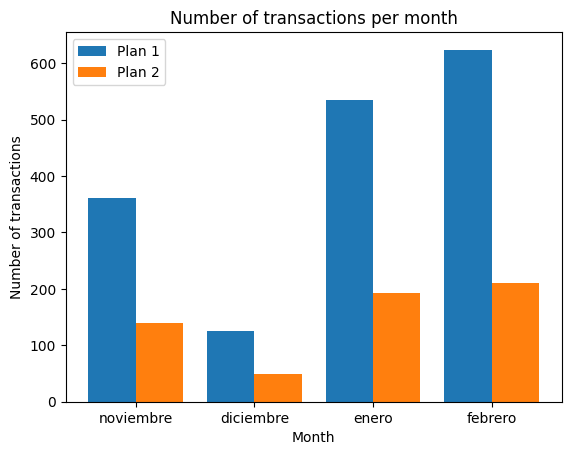

In [21]:
import matplotlib.pyplot as plt 

# Get the number of plans split by month
months = ['noviembre', 'diciembre', 'enero', 'febrero']

number_plan1 = [ dfs[month]['Plan'].value_counts()[0] for month in months ]
number_plan2 = [ dfs[month]['Plan'].value_counts()[1] for month in months ]

X_axis = np.arange(len(months))
  
plt.bar(X_axis - 0.2, number_plan1, 0.4, label = 'Plan 1')
plt.bar(X_axis + 0.2, number_plan2, 0.4, label = 'Plan 2')
  
plt.xticks(X_axis, months)
plt.xlabel("Month")
plt.ylabel("Number of transactions")
plt.title("Number of transactions per month")
plt.legend()

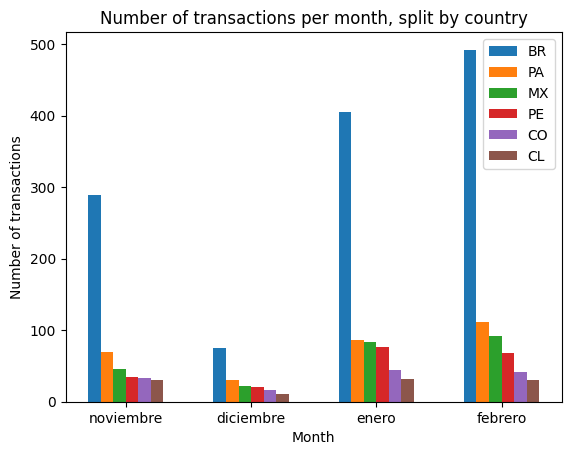

In [22]:
transactions_per_country = [ list(dfs[month]['Country'].value_counts()) for month in months ]

X_axis = np.arange(len(months))

country_name = ['BR','PA','MX','PE','CO','CL']

for country_index in range(0,6):
    transactions = [ row[country_index] for row in transactions_per_country ]
    plt.bar(X_axis+0.1*country_index-0.25, transactions, 0.1, label = country_name[country_index])
  
plt.xticks(X_axis, months)
plt.xlabel("Month")
plt.ylabel("Number of transactions")
plt.title("Number of transactions per month, split by country")
plt.legend()


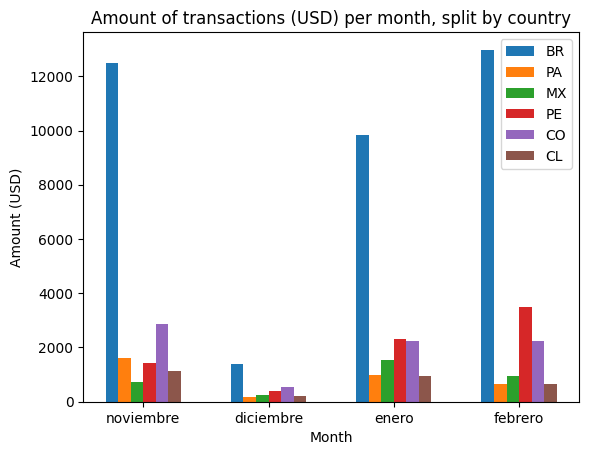

In [23]:
amount_per_country = [ dfs[month].groupby('Country')['Amount Usd'].sum().tolist() for month in months ]

X_axis = np.arange(len(months))

country_name = ['BR','PA','MX','PE','CO','CL']

for country_index in range(0,6):
    amounts = [ row[country_index] for row in amount_per_country ]
    plt.bar(X_axis+0.1*country_index-0.25, amounts, 0.1, label = country_name[country_index])
  
plt.xticks(X_axis, months)
plt.xlabel("Month")
plt.ylabel("Amount (USD)")
plt.title("Amount of transactions (USD) per month, split by country")
plt.legend()

Text(0.5, 1.0, 'Total amount of transactions (USD) per month')

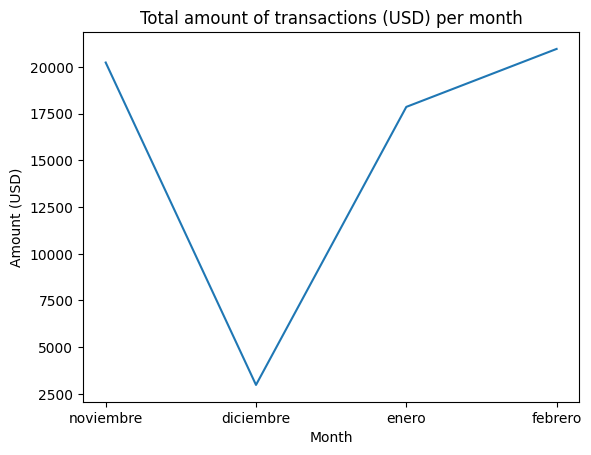

In [24]:
df_monthly_sales = {}
for month in months:
    df_monthly_sales[month] = dfs[month]['Amount Usd'].sum()

plt.plot(df_monthly_sales.keys(), df_monthly_sales.values())
plt.xlabel('Month')
plt.ylabel('Amount (USD)')
plt.title('Total amount of transactions (USD) per month')

In [25]:
transactions_per_month = [sum(transactions) for transactions in transactions_per_country]
for i, month in enumerate(months):
    print(f"Month {month}: {transactions_per_month[i]} transactions")

Month noviembre: 504 transactions
Month diciembre: 175 transactions
Month enero: 727 transactions
Month febrero: 835 transactions


In [26]:
for month, sales in df_monthly_sales.items():
    print(f"{month}: {sales}")

noviembre: 20244.100000000002
diciembre: 2976.47
enero: 17867.559999999998
febrero: 20972.73


In [31]:
dfs["noviembre"]

,Reference,Invoice,External Reference,Date,Amount Usd,Fee amount USD,Local Amount,Local Fee Amount,Local Currency,Exchange Rate,Country,User account,Payment Method,Payment Method Name,Payment Method Type,Status,Plan,Duration
0,T-57873-43a5b0ae-55c0-4f38-b5f6-59d7003c2e5a,PE-P1-1-653955,DLPA0288000004184813,11-2022,10.15,0.74,41.43,3.0120,PEN,4.0812,PE,4370ff50-6274-11eb-8b6f-f982d369514b,MC,Mastercard,CREDIT_CARD,PAID,P1,1
2,D-57873-c263d0d4-17f9-4501-ad69-8ed94aa4521a,BR-P1-1-931470,QRS1TXZS9YQTDKX5NS4WIHJQT6CZCVPOHNH,11-2022,8.82,0.34,50.00,1.9500,BRL,5.6455,BR,109e95e0-9d66-11eb-9de4-5b801bf08e66,PQ,PIX QR,CASH,PAID,P1,1
3,T-57873-961c6cea-5e16-41b1-b2a8-10881b76a399,PE-P1-1-488267,DLPA0288000005194403,11-2022,10.15,0.74,41.43,3.0120,PEN,4.0812,PE,ba9c31f0-64ea-11eb-be1e-531b2e90c600,MC,Mastercard,CREDIT_CARD,PAID,P1,1
4,D-57873-977cb32c-c2aa-4e60-b451-0d1c5ffa0dd6,BR-P1-1-352910,QRS1TXCHFOURGXH6RDFBXDVTLE5QIHSW9TJ,11-2022,8.82,0.34,50.00,1.9500,BRL,5.6455,BR,7132977b-2676-4ae9-87f0-8e282f7d5d11,PQ,PIX QR,CASH,PAID,P1,1
12,T-57873-3d1a802e-268b-4741-8801-ba015dcc0f05,MX-P2-1-483935,850043292687,11-2022,27.74,0.89,570.00,18.2400,MXN,20.5460,MX,07762000-09c2-11ec-ba87-9b1c954c9689,MD,MasterCard Debit,DEBIT_CARD,PAID,P2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,T-57873-c57d126d-2343-4d14-a54d-ea78d11052de,CL-P1-1-699854,1995792657,11-2022,9.77,0.40,9271.00,380.1110,CLP,948.6989,CL,27174981-bd36-485d-b22b-c56301f9801a,MH,Mach,CREDIT_CARD,PAID,P1,1
1145,T-57873-a168136f-eb53-4722-b539-2130ee2e3b29,BR-P1-12-828257,111760230023U2D7O7JC,11-2022,76.03,2.43,420.00,13.4400,BRL,5.5033,BR,ff0f8390-8171-11ec-8647-27f04fc7fd10,EL,Elo,CREDIT_CARD,PAID,P1,12
1155,T-57873-2d06ead4-71ff-455f-9931-805da5144913,MX-P1-1-436998,820060023672,11-2022,9.71,0.31,198.57,6.3542,MXN,20.4520,MX,6b537180-7160-11eb-9096-ad5118a1c541,VD,Visa Debit,DEBIT_CARD,PAID,P1,1
1163,D-57873-324d410d-0965-486b-91fb-c3d4a27be366,BR-P2-1-687640,QRS1TX4GNABBRXO4HIUPXNFALQVFSXLTH44,11-2022,25.60,1.00,141.43,5.5158,BRL,5.5027,BR,26104357-0cf3-4dfc-9c7a-937ddf89bf6c,PQ,PIX QR,CASH,PAID,P2,1


# Cohorts Analysis

In [134]:
# Let's put all the data in the same data frame and keep only month, customer ID and plan

# Create an empty dataframe
df_simplified = pd.DataFrame()

# Add the relevant data, month by month
for i, mes in enumerate(months):
    df_simplified = pd.concat([df_simplified, dfs[mes]])
df_simplified = df_simplified[ ['Invoice', 'Date', 'User account', 'Plan', 'Duration'] ].drop_duplicates()

In [135]:
df_simplified

,Invoice,Date,User account,Plan,Duration
0,PE-P1-1-653955,11-2022,4370ff50-6274-11eb-8b6f-f982d369514b,P1,1
2,BR-P1-1-931470,11-2022,109e95e0-9d66-11eb-9de4-5b801bf08e66,P1,1
3,PE-P1-1-488267,11-2022,ba9c31f0-64ea-11eb-be1e-531b2e90c600,P1,1
4,BR-P1-1-352910,11-2022,7132977b-2676-4ae9-87f0-8e282f7d5d11,P1,1
12,MX-P2-1-483935,11-2022,07762000-09c2-11ec-ba87-9b1c954c9689,P2,1
...,...,...,...,...,...
1388,CO-P1-1-843121,02-2023,f5703ae5-4b3f-4532-b4f4-e604ae1cb9b1,P1,1
1389,BR-P1-1-565792,02-2023,25eea9a0-4c73-49d3-8500-93166b37bd07,P1,1
1390,BR-P1-1-886674,02-2023,28f535e0-594b-11ec-b039-f34849094ca6,P1,1
1391,BR-P1-1-644699,02-2023,7937b18f-3e6a-4f6c-8212-6dcda7b6eef5,P1,1


In [81]:
df_simplified.to_excel('dfsimp.xlsx')

In [136]:
from operator import attrgetter

# Assign a cohort to each transaction.
# A transaction cohort is the month of the oldest transaction of the user
df_simplified['Cohort'] = df_simplified.groupby('User account')['Date'].transform('min')


In [137]:
df_simplified

,Invoice,Date,User account,Plan,Duration,Cohort
0,PE-P1-1-653955,11-2022,4370ff50-6274-11eb-8b6f-f982d369514b,P1,1,11-2022
2,BR-P1-1-931470,11-2022,109e95e0-9d66-11eb-9de4-5b801bf08e66,P1,1,11-2022
3,PE-P1-1-488267,11-2022,ba9c31f0-64ea-11eb-be1e-531b2e90c600,P1,1,11-2022
4,BR-P1-1-352910,11-2022,7132977b-2676-4ae9-87f0-8e282f7d5d11,P1,1,11-2022
12,MX-P2-1-483935,11-2022,07762000-09c2-11ec-ba87-9b1c954c9689,P2,1,01-2023
...,...,...,...,...,...,...
1388,CO-P1-1-843121,02-2023,f5703ae5-4b3f-4532-b4f4-e604ae1cb9b1,P1,1,02-2023
1389,BR-P1-1-565792,02-2023,25eea9a0-4c73-49d3-8500-93166b37bd07,P1,1,01-2023
1390,BR-P1-1-886674,02-2023,28f535e0-594b-11ec-b039-f34849094ca6,P1,1,01-2023
1391,BR-P1-1-644699,02-2023,7937b18f-3e6a-4f6c-8212-6dcda7b6eef5,P1,1,02-2023


In [138]:
grouped = df_simplified.groupby(['Cohort', 'Date']) \
              
cohorts = grouped.agg(n_customers=('User account', 'nunique')) \
            .reset_index(drop=False)

In [139]:
grouped

In [125]:
# convierte las columnas Date y Cohort en objetos datetime
df_simplified["Date"] = pd.to_datetime(df_simplified["Date"], format="%m-%Y")
df_simplified["Cohort"] = pd.to_datetime(df_simplified["Cohort"], format="%m-%Y")
df_cohort["Date"] = pd.to_datetime(df_cohort["Date"], format="%m-%Y")
df_cohort["Cohort"] = pd.to_datetime(df_cohort["Cohort"], format="%m-%Y")

In [126]:
df_cohort

,Cohort,Date,n_customers
0,2023-01-01,2023-01-01,726
1,2023-01-01,2023-02-01,326
2,2023-01-01,2022-11-01,160
3,2023-01-01,2022-12-01,125
4,2023-02-01,2023-02-01,504
5,2023-02-01,2022-11-01,41
6,2023-02-01,2022-12-01,11
7,2022-11-01,2022-11-01,278
8,2022-11-01,2022-12-01,37


In [129]:
df_cohort['Period_Number'] = \
    ((df_cohort["Date"] - df_cohort["Cohort"]) / np.timedelta64(1, 'M')).fillna(0).astype(int) # number of periods between the cohort month and the month of the purchase.

In [130]:
df_cohort

,Cohort,Date,n_customers,Period_Number
0,2023-01-01,2023-01-01,726,0
1,2023-01-01,2023-02-01,326,1
2,2023-01-01,2022-11-01,160,-2
3,2023-01-01,2022-12-01,125,-1
4,2023-02-01,2023-02-01,504,0
5,2023-02-01,2022-11-01,41,-3
6,2023-02-01,2022-12-01,11,-2
7,2022-11-01,2022-11-01,278,0
8,2022-11-01,2022-12-01,37,0


In [131]:
df_simplified

,Invoice,Date,User account,Plan,Duration,Cohort
0,PE-P1-1-653955,2022-11-01,4370ff50-6274-11eb-8b6f-f982d369514b,P1,1,2022-11-01
2,BR-P1-1-931470,2022-11-01,109e95e0-9d66-11eb-9de4-5b801bf08e66,P1,1,2022-11-01
3,PE-P1-1-488267,2022-11-01,ba9c31f0-64ea-11eb-be1e-531b2e90c600,P1,1,2022-11-01
4,BR-P1-1-352910,2022-11-01,7132977b-2676-4ae9-87f0-8e282f7d5d11,P1,1,2022-11-01
12,MX-P2-1-483935,2022-11-01,07762000-09c2-11ec-ba87-9b1c954c9689,P2,1,2023-01-01
...,...,...,...,...,...,...
1388,CO-P1-1-843121,2023-02-01,f5703ae5-4b3f-4532-b4f4-e604ae1cb9b1,P1,1,2023-02-01
1389,BR-P1-1-565792,2023-02-01,25eea9a0-4c73-49d3-8500-93166b37bd07,P1,1,2023-01-01
1390,BR-P1-1-886674,2023-02-01,28f535e0-594b-11ec-b039-f34849094ca6,P1,1,2023-01-01
1391,BR-P1-1-644699,2023-02-01,7937b18f-3e6a-4f6c-8212-6dcda7b6eef5,P1,1,2023-02-01


In [133]:
cohort_pivot = df_cohort.pivot_table(index='Cohort', columns='Period_Number', values='n_customers')

# convierte el índice a formato datetime
cohort_pivot.index = pd.to_datetime(cohort_pivot.index)

for i, month in enumerate(months):
    if not i in cohort_pivot.index:
        cohort_pivot.loc[i] = np.nan
        cohort_pivot[0][i] = 0
cohort_pivot.sort_index(inplace=True)

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [14]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [15]:
retention_matrix

period_number,0,1,2,3
cohort,,,,
0,1.0,0.361169,0.334029,0.311065
1,NaN,NaN,NaN,NaN
2,1.0,0.385159,NaN,NaN
3,1.0,NaN,NaN,NaN


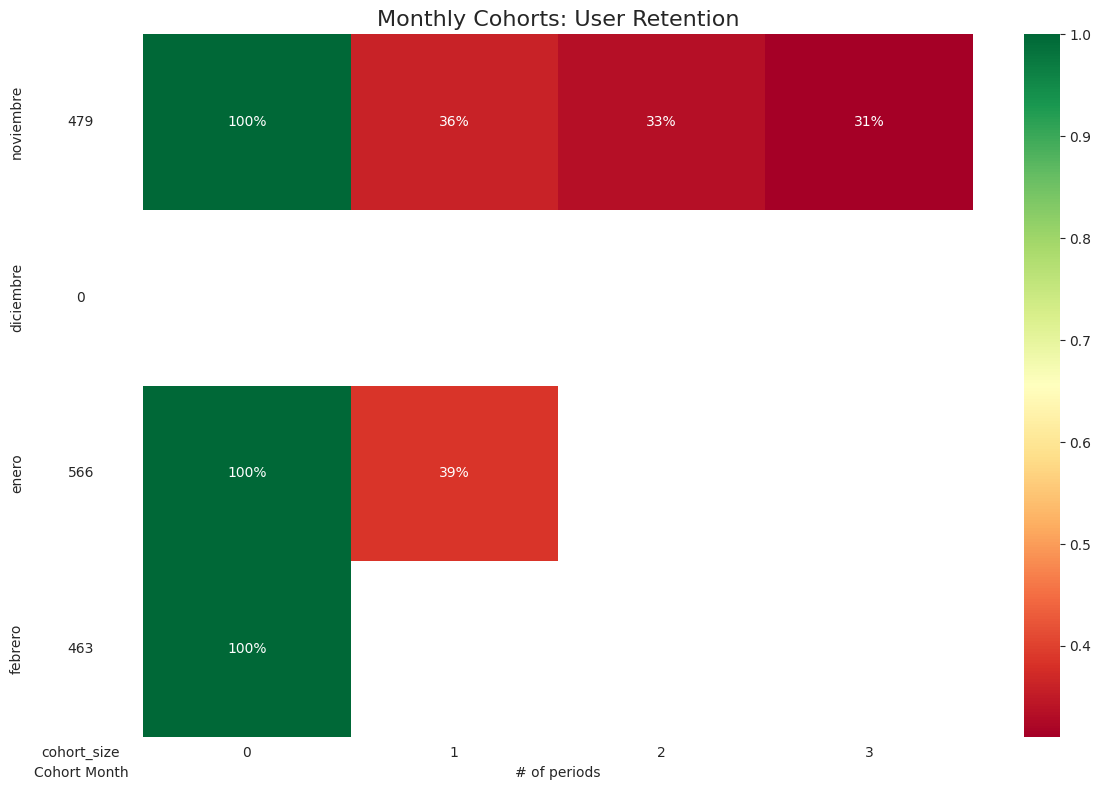

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    cohort_size_df['Month'] = months
    cohort_size_df.set_index('Month', inplace=True)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])
    ax[0].set(xlabel='Cohort Month',
              ylabel='')

    fig.tight_layout()